# Motivationsbeispiel

## von Joel Grus, angepasst HR

"""
This is code for the introduction chapter. As such, it stands alone
and won't be used anywhere else in the book.
"""

# Teil 1: Netzwerke

In [36]:
#Nutzer
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

#wer kennt wen?
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [37]:
#Ziel: für jeden Nutzer direkt die "Freunde" ablesen können

# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [38]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

#Beispiel
number_of_friends({"id": 0, "name": "Hero"})

2

In [39]:
total_connections = sum(number_of_friends(user)
                        for user in users)        # 24


assert total_connections == 24
total_connections

24

In [40]:
num_users = len(users)                            # length of the users list
avg_connections = total_connections / num_users   # 24 / 10 == 2.4

In [41]:
assert num_users == 10
num_users

10

In [42]:
assert avg_connections == 2.4
avg_connections

2.4

In [43]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(                                # Sort the list
       key=lambda id_and_friends: id_and_friends[1],   # by num_friends
       reverse=True)                                   # largest to smallest

# Each pair is (user_id, num_friends):
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
#  (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [44]:
assert num_friends_by_id[0][1] == 3     # several people have 3 friends
num_friends_by_id[0][1]

3

In [45]:
assert num_friends_by_id[-1] == (9, 1)  # user 9 has only 1 friend
num_friends_by_id[-1]

(9, 1)

# Teil 2: Kennen sie schon ...?

In [46]:
# Liste mit Freunden von Freunden "über eine Ecke"
# Naive Implementation - wo liegt der Denkfehler?
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

#[0, 2, 3, 0, 1, 3]


In [47]:
assert foaf_ids_bad(users[0]) == [0, 2, 3, 0, 1, 3]
foaf_ids_bad(users[0])


[0, 2, 3, 0, 1, 3]

In [48]:
#woran liegt's?
print(friendships[0])  # [1, 2]
print(friendships[1])  # [0, 2, 3]
print(friendships[2])  # [0, 1, 3]

assert friendships[0] == [1, 2]
assert friendships[1] == [0, 2, 3]
assert friendships[2] == [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [49]:
from collections import Counter                   # not loaded by default

#besser mit zusätzlichen Überprüfungen...
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )

friends_of_friends(users[0])

Counter({3: 2})

In [50]:
#weiteres Beispiel
print(friends_of_friends(users[3]))               # Counter({0: 2, 5: 1})

assert friends_of_friends(users[3]) == Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [51]:
# Alternative: Vorschläge über gemeinsame Interessen
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest."""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

# ausprobieren
data_scientists_who_like("Python")

[2, 3, 5]

In [52]:
# schon ganz gut, aber besser wäre eine Indexstruktur
# Interesse -> Nutzer
# oder andersrum
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [53]:
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [54]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

In [55]:
most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [56]:
most_common_interests_with(users[5])

Counter({2: 1, 3: 2, 0: 1, 9: 1})

# Teil 3: Gehälter und Erfahrung

In [57]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

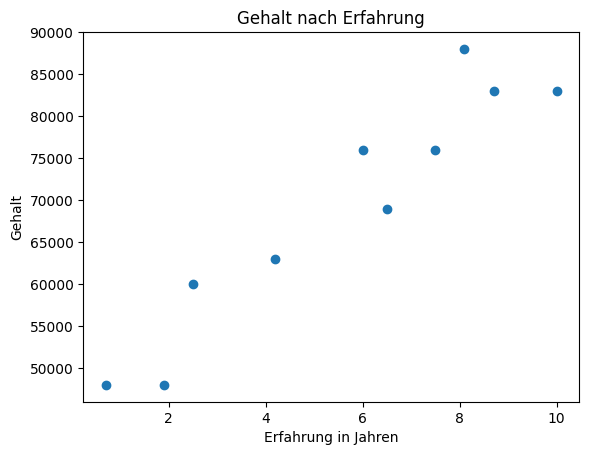

In [58]:
# Visualisierung (Einschub HR)
salaries = []
tenures = []
for salary, tenure in salaries_and_tenures:
    salaries.append(salary)
    tenures.append(tenure)

from matplotlib import pyplot as plt
plt.scatter(tenures, salaries)
plt.title("Gehalt nach Erfahrung")
plt.xlabel("Erfahrung in Jahren")
plt.ylabel("Gehalt")
plt.show()


In [59]:
# Aus Graphik: Mehr Erfahrung korreliert mit mehr Gehalt
# also: Idee Gehalt nach Dienstjahren# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [60]:
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}


In [61]:
assert average_salary_by_tenure == {
    0.7: 48000.0,
    1.9: 48000.0,
    2.5: 60000.0,
    4.2: 63000.0,
    6: 76000.0,
    6.5: 69000.0,
    7.5: 76000.0,
    8.1: 88000.0,
    8.7: 83000.0,
    10: 83000.0
}

average_salary_by_tenure
# Mmh... nicht hilfreich - warum?
# was kann man machen?

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [62]:
#zu wenig Datenpunkte: Klasseneinteilung/Cluster
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [63]:
# Keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

assert average_salary_by_bucket == {
    'between two and five': 61500.0,
    'less than two': 48000.0,
    'more than five': 79166.66666666667
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

# Teil 4: Nutzerkonten

In [64]:
# Datensatz
"""0.7 paid
1.9 unpaid
2.5 paid
4.2 unpaid
6.0 unpaid
6.5 unpaid
7.5 unpaid
8.1 unpaid
8.7 paid
10.0 paid
"""

# noch zu wenige Daten für Vorhersage...
# so etwas in der Art hätte man gerne

def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"


# Teil 5: Blog-Themen

In [65]:
# Interessen von vorhin...
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [66]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

#ansehen/problematisch: big, learning ...




big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
